In [110]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, KFold, cross_validate, train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis
from sklearn import random_projection
from scipy.linalg import pinv
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.manifold import TSNE

In [111]:
#load data
df = pd.read_csv(r'./credit.csv')

In [112]:
# Cleaning data

df = df.drop('ID', axis=1)
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()
df = df.rename(columns={'PAY_0':'PAY_1'})
fil = (df.PAY_1 == -2) | (df.PAY_1 == -1) | (df.PAY_1 == 0)
df.loc[fil, 'PAY_1'] = 0 
fil = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[fil, 'PAY_2'] = 0
fil = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[fil, 'PAY_3'] = 0
fil = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[fil, 'PAY_4'] = 0
fil = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[fil, 'PAY_5'] = 0
fil = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[fil, 'PAY_6'] = 0
df = df.rename(columns={'default payment next month':'default'})
fil = (df.PAY_1 == 0) & (df.PAY_2 == 0) & (df.PAY_3 == 0) & (df.PAY_4 == 0) & (df.PAY_5 == 0) & (df.PAY_6 == 0) & (df.default ==1)
df.loc[fil,'default'] = 0
fil = (df.PAY_1 > 0) & (df.PAY_2 > 0) & (df.PAY_3 > 0) & (df.PAY_4 > 0) & (df.PAY_5 > 0) & (df.PAY_6 > 0) & (df.default ==0)
df.loc[fil,'default'] = 1

In [113]:
y = df.pop('default')
#scale features
X_scaled = preprocessing.scale(df)

#split train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

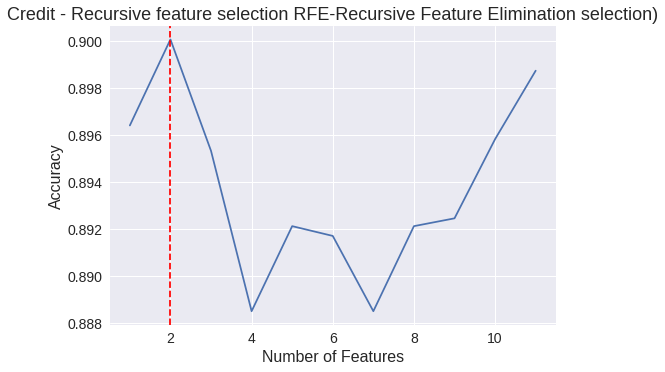

In [114]:
#recursive feature selection RFE
#dim reduction using labels
n_features = X_train.shape[1]
y_train=y_train.astype('int')
accuracy_list = []
kfold = StratifiedKFold(n_splits=3, random_state=42,shuffle = True)
for feature in range(1,n_features+1):
    selector = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=feature)
    selector = selector.fit(X_train, y_train)
    X_reduced = X_train[:,selector.support_]
    rf = RandomForestClassifier(random_state=42)
    mean_accuracy = np.mean(cross_val_score(rf, X_reduced, y_train, scoring='accuracy', cv=5, n_jobs=-1, error_score='raise'))
    accuracy_list.append(mean_accuracy)
plt.style.use('seaborn')
plt.plot(range(1,n_features+1),accuracy_list)
plt.xlabel('Number of Features', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)
#plt.legend(fontsize=16)
plt.title('Credit - Recursive feature selection RFE-Recursive Feature Elimination selection)', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
#plt.ylim(0.75,0.81)
plt.axvline(x=2,color='r', linestyle='--')
plt.show()

In [115]:
#use 2 components based on above tests
selector = RFE(estimator=RandomForestClassifier(random_state=10), n_features_to_select=10)
selector = selector.fit(X_train, y_train)
X_reduced = X_train[:,selector.support_]

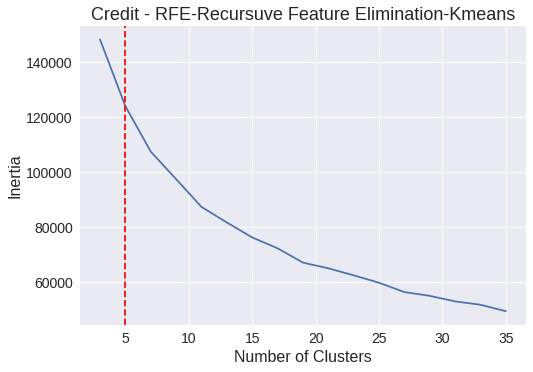

In [116]:
#find best kmeans on pca data using elbow method
cluster_range = [3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35]
#mean squared distance between each instance and its closest centroid. Also called inertia
msd = []
for num_cluster in cluster_range:
    c = KMeans(n_clusters=num_cluster, random_state=1)
    #apply kmeans on pca data
    c_labels = c.fit(X_reduced)
    msd.append(c.inertia_)
plt.style.use('seaborn')
plt.plot([3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35],msd)
plt.xlabel('Number of Clusters', fontsize = 16)
plt.ylabel('Inertia', fontsize = 16)
plt.title('Credit - RFE-Recursuve Feature Elimination-Kmeans', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.axvline(x=5,color='r', linestyle='--')
plt.show()

[0.4565792663710612]
[0.4565792663710612, 0.18886804962482348]
[0.4565792663710612, 0.18886804962482348, 0.19476663607450662]
[0.4565792663710612, 0.18886804962482348, 0.19476663607450662, 0.1737907422172137]
[0.4565792663710612, 0.18886804962482348, 0.19476663607450662, 0.1737907422172137, 0.18162742574081533]
[0.4565792663710612, 0.18886804962482348, 0.19476663607450662, 0.1737907422172137, 0.18162742574081533, 0.15653816717393504]
[0.4565792663710612, 0.18886804962482348, 0.19476663607450662, 0.1737907422172137, 0.18162742574081533, 0.15653816717393504, 0.160030232378608]
[0.4565792663710612, 0.18886804962482348, 0.19476663607450662, 0.1737907422172137, 0.18162742574081533, 0.15653816717393504, 0.160030232378608, 0.162334498057692]
[0.4565792663710612, 0.18886804962482348, 0.19476663607450662, 0.1737907422172137, 0.18162742574081533, 0.15653816717393504, 0.160030232378608, 0.162334498057692, 0.16030309702205647]
[0.4565792663710612, 0.18886804962482348, 0.19476663607450662, 0.173790

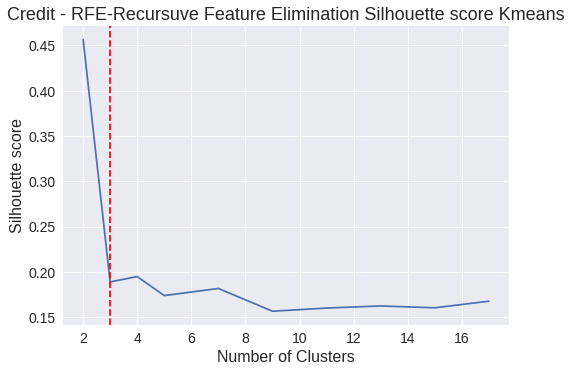

In [117]:
#find best kmeans on pca data using silhouette method
cluster_range = [2,3,4,5,7,9,11,13,15,17]
#mean squared distance between each instance and its closest centroid. Also called inertia
silhouette_list = []
for num_cluster in cluster_range:
    c = KMeans(n_clusters=num_cluster, random_state=10)
    c_labels = c.fit_predict(X_reduced)
    silhouette_list.append(silhouette_score(X_train, c_labels))
    print(silhouette_list)
plt.style.use('seaborn')
plt.plot([2,3,4,5,7,9,11,13,15,17],silhouette_list)
plt.xlabel('Number of Clusters', fontsize = 16)
plt.ylabel('Silhouette score', fontsize = 16)
plt.title('Credit - RFE-Recursuve Feature Elimination Silhouette score Kmeans', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.axvline(x=3,color='r', linestyle='--')
plt.show()

In [52]:
#use 2 clusters based on above tests
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans_labels = kmeans.fit(X_reduced)

In [55]:
def convert_numarr_to_df_pca (X_train,y_train,features):
    #convert back X_train to df for visulaization
    rows = X_train.shape[0]
    col_list = []
    #target = np.reshape(y_train.to_numpy(),(rows,1))
    target = np.reshape(y_train,(rows,1))
    X_train_vis = np.hstack((X_train,target))
    for i in range(1,features+1):
        col_list.append('component_' + str(i))
    #col_list = list(df.columns)
    col_list.append('quality')
    df_vis = pd.DataFrame(data=X_train_vis,    # values
            #index=data[1:,0],    # 1st column as index
            columns=col_list)
    return df_vis

In [56]:
df_vis_rfe_credit = convert_numarr_to_df_pca(X_reduced,kmeans_labels.labels_,X_reduced.shape[1])

In [121]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300,random_state=42)
tsne_results = tsne.fit_transform(df_vis_rfe_credit)

df_vis_rfe_credit['tsne-2d-one'] = tsne_results[:,0]
df_vis_rfe_credit['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(8,4))
sns.scatterplot(
    x="tsne-2d-one",
    y="tsne-2d-two",
    hue="quality",
    palette=sns.color_palette("hls", 3),
    data=df_vis_rfe_credit,
    legend="diag",
    alpha=0.3
)
plt.title('Credit-5 clusters for kmeans based on RFE-Recursuve Feature Elimination', fontsize = 14)
plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 24000 samples in 0.058s...
[t-SNE] Computed neighbors for 24000 samples in 1.893s...
[t-SNE] Computed conditional probabilities for sample 1000 / 24000
[t-SNE] Computed conditional probabilities for sample 2000 / 24000
[t-SNE] Computed conditional probabilities for sample 3000 / 24000
[t-SNE] Computed conditional probabilities for sample 4000 / 24000
[t-SNE] Computed conditional probabilities for sample 5000 / 24000
[t-SNE] Computed conditional probabilities for sample 6000 / 24000
[t-SNE] Computed conditional probabilities for sample 7000 / 24000
[t-SNE] Computed conditional probabilities for sample 8000 / 24000
[t-SNE] Computed conditional probabilities for sample 9000 / 24000
[t-SNE] Computed conditional probabilities for sample 10000 / 24000
[t-SNE] Computed conditional probabilities for sample 11000 / 24000
[t-SNE] Computed conditional probabilities for sample 12000 / 24000
[t-SNE] Computed conditional probabilities for sa

KeyboardInterrupt: 

AIC for n_clusters(2): [-415633.9892249025]
BIC for n_clusters(2): [-415302.47105141997]
AIC for n_clusters(3): [-415633.9892249025, -682614.7236941257]
BIC for n_clusters(3): [-415302.47105141997, -682113.4035293472]
AIC for n_clusters(5): [-415633.9892249025, -682614.7236941257, -837807.1239980387]
BIC for n_clusters(5): [-415302.47105141997, -682113.4035293472, -836966.1998506684]
AIC for n_clusters(6): [-415633.9892249025, -682614.7236941257, -837807.1239980387, -970339.7053998164]
BIC for n_clusters(6): [-415302.47105141997, -682113.4035293472, -836966.1998506684, -969328.9792611501]
AIC for n_clusters(7): [-415633.9892249025, -682614.7236941257, -837807.1239980387, -970339.7053998164, -977695.1188021107]
BIC for n_clusters(7): [-415302.47105141997, -682113.4035293472, -836966.1998506684, -969328.9792611501, -976514.5906721485]
AIC for n_clusters(9): [-415633.9892249025, -682614.7236941257, -837807.1239980387, -970339.7053998164, -977695.1188021107, -1069330.1517271197]
BIC for n_

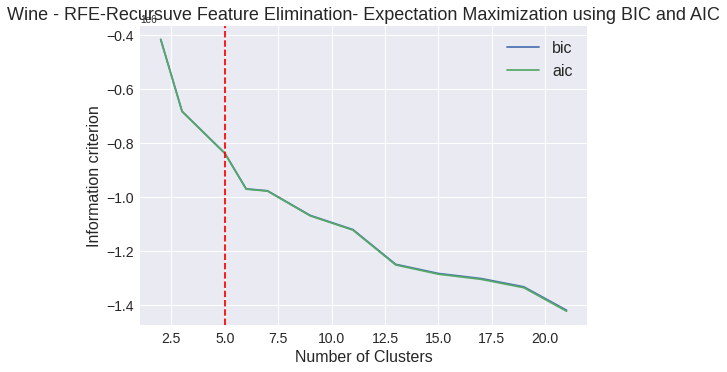

In [90]:
#Refer to last page which explains why AIC and BIC can be different.
#Basically more the number of clusters, more the number of gaussian distributions
#and more the number of parameters. Based on the increased number of parameters,
#bic is penalized which causes bic value to increase.
cluster_range = [2,3,5,6,7,9,11,13,15,17,19,21]
bic = []
aic = []
for num_cluster in cluster_range:
    gmm = GaussianMixture(covariance_type = 'diag', n_components = num_cluster, n_init = 10,random_state=1)
    c_labels = gmm.fit(X_reduced)
    bic.append(gmm.bic(X_reduced))
    aic.append(gmm.aic(X_reduced))
    print('AIC for n_clusters(%s): %s'%(num_cluster, aic))
    print('BIC for n_clusters(%s): %s'%(num_cluster, bic))
    
plt.style.use('seaborn')
plt.plot([2,3,5,6,7,9,11,13,15,17,19,21],bic,label = 'bic')
plt.plot([2,3,5,6,7,9,11,13,15,17,19,21],aic,label = 'aic')
plt.xlabel('Number of Clusters', fontsize = 16)
plt.ylabel('Information criterion', fontsize = 16)
plt.legend(fontsize=16)
plt.title('Wine - RFE-Recursuve Feature Elimination- Expectation Maximization using BIC and AIC', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.axvline(x=5,color='r', linestyle='--')
#plt.ylim(20000,35000)
plt.show()

In [125]:
gmm = GaussianMixture(covariance_type = 'diag', n_components = 5, n_init = 10,random_state=1)
gmm_c_labels = gmm.fit(X_reduced)

In [126]:
df_vis_gmm_rfe_credit = convert_numarr_to_df_pca(X_reduced,gmm_c_labels.predict(X_reduced),X_reduced.shape[1])

In [127]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300,random_state=10)
tsne_results = tsne.fit_transform(df_vis_gmm_rfe_credit)

df_vis_gmm_rfe_credit['tsne-2d-one'] = tsne_results[:,0]
df_vis_gmm_rfe_credit['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(8,4))
sns.scatterplot(
    x="tsne-2d-one",
    y="tsne-2d-two",
    hue="quality",
    palette=sns.color_palette("hls", 5),
    data=df_vis_gmm_rfe_credit,
    legend="full",
    alpha=0.3
)
plt.title('Credit-5 clusters for Expectation Maximization based on RFE-Recursuve Feature Elimination-', fontsize = 14)
plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 24000 samples in 0.923s...
[t-SNE] Computed neighbors for 24000 samples in 5.780s...
[t-SNE] Computed conditional probabilities for sample 1000 / 24000
[t-SNE] Computed conditional probabilities for sample 2000 / 24000
[t-SNE] Computed conditional probabilities for sample 3000 / 24000
[t-SNE] Computed conditional probabilities for sample 4000 / 24000
[t-SNE] Computed conditional probabilities for sample 5000 / 24000
[t-SNE] Computed conditional probabilities for sample 6000 / 24000
[t-SNE] Computed conditional probabilities for sample 7000 / 24000
[t-SNE] Computed conditional probabilities for sample 8000 / 24000
[t-SNE] Computed conditional probabilities for sample 9000 / 24000
[t-SNE] Computed conditional probabilities for sample 10000 / 24000
[t-SNE] Computed conditional probabilities for sample 11000 / 24000
[t-SNE] Computed conditional probabilities for sample 12000 / 24000
[t-SNE] Computed conditional probabilities for sa

ValueError: Could not interpret value `quality` for parameter `hue`

<Figure size 576x288 with 0 Axes>

In [128]:
#load data
df = pd.read_csv(r'./wine.csv')

y = df.pop('class')
#scale features
X_scaled = preprocessing.scale(df)

#split train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [129]:
#scale features
X_scaled = preprocessing.scale(df)

#oversample = BorderlineSMOTE(random_state=42)
#X_scaled, y = oversample.fit_resample(X_scaled, y)


#split train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)


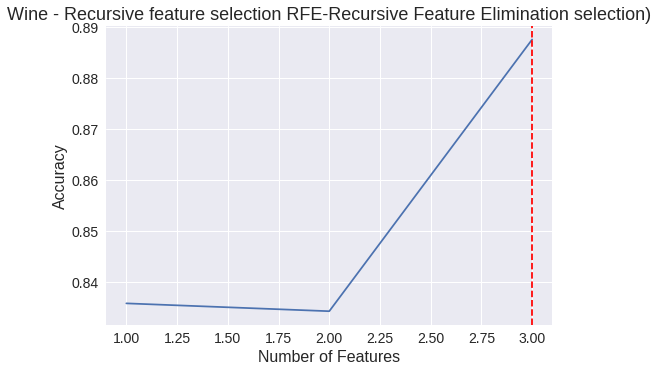

In [130]:
#recursive feature selection RFE
#dim reduction using labels
n_features = X_train.shape[1]
y_train=y_train.astype('int')
accuracy_list = []
kfold = StratifiedKFold(n_splits=3, random_state=42,shuffle = True)
for feature in range(1,n_features+1):
    selector = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=feature)
    selector = selector.fit(X_train, y_train)
    X_reduced = X_train[:,selector.support_]
    rf = RandomForestClassifier(random_state=42)
    mean_accuracy = np.mean(cross_val_score(rf, X_reduced, y_train, scoring='accuracy', cv=5, n_jobs=-1, error_score='raise'))
    accuracy_list.append(mean_accuracy)
plt.style.use('seaborn')
plt.plot(range(1,n_features+1),accuracy_list)
plt.xlabel('Number of Features', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)
#plt.legend(fontsize=16)
plt.title('Wine - Recursive feature selection RFE-Recursive Feature Elimination selection)', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
#plt.ylim(0.75,0.81)
plt.axvline(x=3,color='r', linestyle='--')
plt.show()

In [131]:
#use 3 components based on above tests
selector = RFE(estimator=RandomForestClassifier(random_state=10), n_features_to_select=3)
selector = selector.fit(X_train, y_train)
X_reduced = X_train[:,selector.support_]

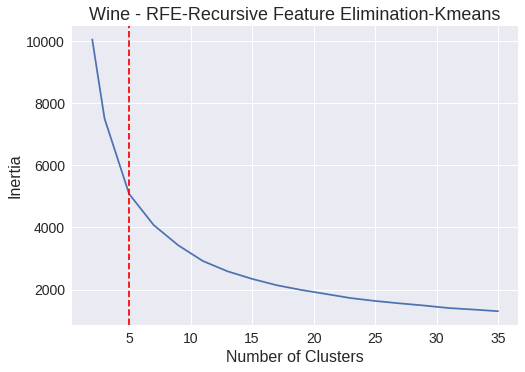

In [132]:
#find best kmeans on pca data using elbow method
cluster_range = [2,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35]
#mean squared distance between each instance and its closest centroid. Also called inertia
msd = []
for num_cluster in cluster_range:
    c = KMeans(n_clusters=num_cluster, random_state=42)
    #apply kmeans on pca data
    c_labels = c.fit(X_reduced)
    msd.append(c.inertia_)
plt.style.use('seaborn')
plt.plot([2,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35],msd)
plt.xlabel('Number of Clusters', fontsize = 16)
plt.ylabel('Inertia', fontsize = 16)
plt.title('Wine - RFE-Recursive Feature Elimination-Kmeans', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.axvline(x=5,color='r', linestyle='--')
plt.show()

[0.33384956613211797]
[0.33384956613211797, 0.3122765403085913]
[0.33384956613211797, 0.3122765403085913, 0.30675147558737187]
[0.33384956613211797, 0.3122765403085913, 0.30675147558737187, 0.2887634568487136]
[0.33384956613211797, 0.3122765403085913, 0.30675147558737187, 0.2887634568487136, 0.26709329491168565]
[0.33384956613211797, 0.3122765403085913, 0.30675147558737187, 0.2887634568487136, 0.26709329491168565, 0.278940393167392]
[0.33384956613211797, 0.3122765403085913, 0.30675147558737187, 0.2887634568487136, 0.26709329491168565, 0.278940393167392, 0.28476636720787285]
[0.33384956613211797, 0.3122765403085913, 0.30675147558737187, 0.2887634568487136, 0.26709329491168565, 0.278940393167392, 0.28476636720787285, 0.2896604513680114]
[0.33384956613211797, 0.3122765403085913, 0.30675147558737187, 0.2887634568487136, 0.26709329491168565, 0.278940393167392, 0.28476636720787285, 0.2896604513680114, 0.28292725998325047]
[0.33384956613211797, 0.3122765403085913, 0.30675147558737187, 0.28876

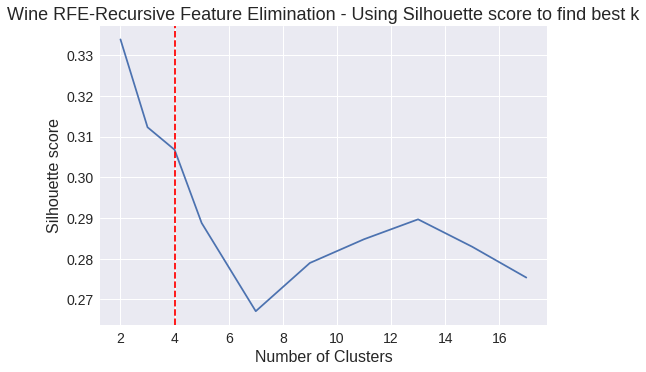

In [96]:
#find best kmeans on pca data using silhouette method
cluster_range = [2,3,4,5,7,9,11,13,15,17]
#mean squared distance between each instance and its closest centroid. Also called inertia
silhouette_list = []
for num_cluster in cluster_range:
    c = KMeans(n_clusters=num_cluster, random_state=42)
    c_labels = c.fit_predict(X_reduced)
    silhouette_list.append(silhouette_score(X_train, c_labels))
    print(silhouette_list)
plt.style.use('seaborn')
plt.plot([2,3,4,5,7,9,11,13,15,17],silhouette_list)
plt.xlabel('Number of Clusters', fontsize = 16)
plt.ylabel('Silhouette score', fontsize = 16)
plt.title('Wine RFE-Recursive Feature Elimination - Using Silhouette score to find best k', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.axvline(x=4,color='r', linestyle='--')
plt.show()

In [133]:
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans_labels = kmeans.fit(X_reduced)

In [134]:
def convert_numarr_to_df_pca (X_train,y_train,features):
    #convert back X_train to df for visulaization
    rows = X_train.shape[0]
    col_list = []
    #target = np.reshape(y_train.to_numpy(),(rows,1))
    target = np.reshape(y_train,(rows,1))
    X_train_vis = np.hstack((X_train,target))
    for i in range(1,features+1):
        col_list.append('component_' + str(i))
    #col_list = list(df.columns)
    col_list.append('class')
    df_vis = pd.DataFrame(data=X_train_vis,    # values
            #index=data[1:,0],    # 1st column as index
            columns=col_list)
    return df_vis

In [135]:
df_vis_rfe_wine = convert_numarr_to_df_pca(X_reduced,kmeans_labels.labels_,X_reduced.shape[1])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5197 samples in 0.004s...
[t-SNE] Computed neighbors for 5197 samples in 0.214s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5197
[t-SNE] Computed conditional probabilities for sample 2000 / 5197
[t-SNE] Computed conditional probabilities for sample 3000 / 5197
[t-SNE] Computed conditional probabilities for sample 4000 / 5197
[t-SNE] Computed conditional probabilities for sample 5000 / 5197
[t-SNE] Computed conditional probabilities for sample 5197 / 5197
[t-SNE] Mean sigma: 0.195969
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.204338
[t-SNE] KL divergence after 300 iterations: 1.535920


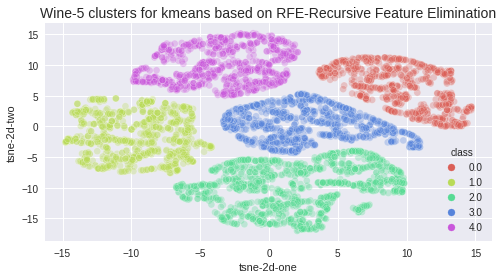

In [136]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300,random_state=42)
tsne_results = tsne.fit_transform(df_vis_rfe_wine)

df_vis_rfe_wine['tsne-2d-one'] = tsne_results[:,0]
df_vis_rfe_wine['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(8,4))
sns.scatterplot(
    x="tsne-2d-one",
    y="tsne-2d-two",
    hue="class",
    palette=sns.color_palette("hls", 5),
    data=df_vis_rfe_wine,
    legend="full",
    alpha=0.3
)
plt.title('Wine-5 clusters for kmeans based on RFE-Recursive Feature Elimination', fontsize = 14)
plt.show()

AIC for n_clusters(3): [36497.262725681205]
BIC for n_clusters(3): [36628.37946198137]
AIC for n_clusters(5): [36497.262725681205, 35898.41014797283]
BIC for n_clusters(5): [36628.37946198137, 36121.308599683114]
AIC for n_clusters(6): [36497.262725681205, 35898.41014797283, 35581.824412802845]
BIC for n_clusters(6): [36628.37946198137, 36121.308599683114, 35850.61372221819]
AIC for n_clusters(7): [36497.262725681205, 35898.41014797283, 35581.824412802845, 35384.35287291082]
BIC for n_clusters(7): [36628.37946198137, 36121.308599683114, 35850.61372221819, 35699.03304003123]
AIC for n_clusters(9): [36497.262725681205, 35898.41014797283, 35581.824412802845, 35384.35287291082, 35085.08027586433]
BIC for n_clusters(9): [36628.37946198137, 36121.308599683114, 35850.61372221819, 35699.03304003123, 35491.542158394856]
AIC for n_clusters(11): [36497.262725681205, 35898.41014797283, 35581.824412802845, 35384.35287291082, 35085.08027586433, 35017.04816576878]
BIC for n_clusters(11): [36628.37946

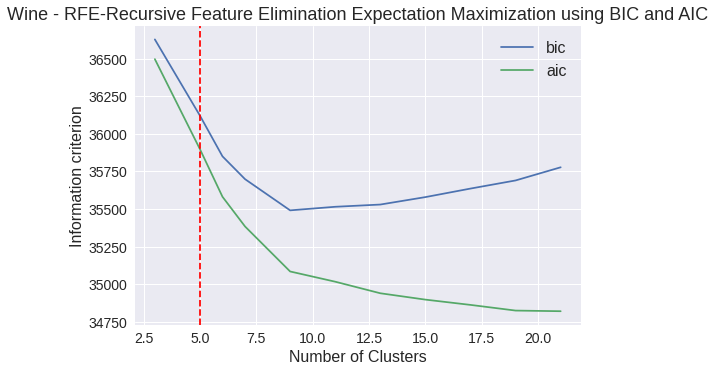

In [102]:
#Refer to last page which explains why AIC and BIC can be different.
#Basically more the number of clusters, more the number of gaussian distributions
#and more the number of parameters. Based on the increased number of parameters,
#bic is penalized which causes bic value to increase.
cluster_range = [3,5,6,7,9,11,13,15,17,19,21]
bic = []
aic = []
for num_cluster in cluster_range:
    gmm = GaussianMixture(covariance_type = 'diag', n_components = num_cluster, n_init = 10,random_state=1)
    c_labels = gmm.fit(X_reduced)
    bic.append(gmm.bic(X_reduced))
    aic.append(gmm.aic(X_reduced))
    print('AIC for n_clusters(%s): %s'%(num_cluster, aic))
    print('BIC for n_clusters(%s): %s'%(num_cluster, bic))
plt.style.use('seaborn')
plt.plot([3,5,6,7,9,11,13,15,17,19,21],bic,label = 'bic')
plt.plot([3,5,6,7,9,11,13,15,17,19,21],aic,label = 'aic')
plt.xlabel('Number of Clusters', fontsize = 16)
plt.ylabel('Information criterion', fontsize = 16)
plt.legend(fontsize=16)
plt.title('Wine - RFE-Recursive Feature Elimination Expectation Maximization using BIC and AIC', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.axvline(x=5,color='r', linestyle='--')
#plt.ylim(20000,35000)
plt.show()

In [103]:
gmm = GaussianMixture(covariance_type = 'diag', n_components = 5, n_init = 10,random_state=1)
gmm_c_labels = gmm.fit(X_reduced)

In [104]:
df_vis_gmm_rfe_diabetes = convert_numarr_to_df_pca(X_reduced,gmm_c_labels.predict(X_reduced),X_reduced.shape[1])

In [137]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300,random_state=42)
tsne_results = tsne.fit_transform(df_vis_gmm_rfe_wine)

df_vis_gmm_rfe_wine['tsne-2d-one'] = tsne_results[:,0]
df_vis_gmm_rfe_wine['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(8,4))
sns.scatterplot(
    x="tsne-2d-one",
    y="tsne-2d-two",
    hue="class",
    palette=sns.color_palette("hls", 5),
    data=df_vis_gmm_rfe_wine,
    legend="full",
    alpha=0.3
)
plt.title('Wine-5 clusters for Expectation Maximization based on RFE-Recursive Feature Elimination', fontsize = 14)
plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 24000 samples in 0.051s...
[t-SNE] Computed neighbors for 24000 samples in 2.255s...
[t-SNE] Computed conditional probabilities for sample 1000 / 24000
[t-SNE] Computed conditional probabilities for sample 2000 / 24000
[t-SNE] Computed conditional probabilities for sample 3000 / 24000
[t-SNE] Computed conditional probabilities for sample 4000 / 24000
[t-SNE] Computed conditional probabilities for sample 5000 / 24000
[t-SNE] Computed conditional probabilities for sample 6000 / 24000
[t-SNE] Computed conditional probabilities for sample 7000 / 24000
[t-SNE] Computed conditional probabilities for sample 8000 / 24000
[t-SNE] Computed conditional probabilities for sample 9000 / 24000
[t-SNE] Computed conditional probabilities for sample 10000 / 24000
[t-SNE] Computed conditional probabilities for sample 11000 / 24000
[t-SNE] Computed conditional probabilities for sample 12000 / 24000
[t-SNE] Computed conditional probabilities for sa

ValueError: Could not interpret value `class` for parameter `hue`

<Figure size 576x288 with 0 Axes>